In [1]:
# Fix LaTeX path before importing matplotlib
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

#Lunna's
from scipy import stats
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from math import ceil
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import scipy as sp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 20})

plw = 1.0 #0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc
import math

/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def print_progress(iteration, total, bar_length=50):
    progress = (iteration / total)
    arrow = '*' * int(round(bar_length * progress))
    spaces = ' ' * (bar_length - len(arrow))
    print(f'\r|{arrow}{spaces}| {int(progress * 100)}%', end='', flush=True)

In [3]:
X=lambda nX, ntot, nstot,: (ntot-nX)/(ntot+nstot-nX)
X_macro=lambda ntot, nstot,: (ntot)/(ntot+nstot)

def fit_linear(x,y):
     mx,cx=np.polyfit(x, y, 1)
     return mx,cx

def func(t,tau):
    y=np.exp(-t/tau)
    return y

In [4]:
v_na=4.5E-2*0.5 #nm3 per ion #0.045

In [5]:
## Load data
data = pd.read_excel(r'nacl_sims_CNnq6_ion.xlsx')

NA=6.02214076E23;
kT=2.49; #kJ/mol;
print(data)
ERR=lambda tpl, kT, nX, ntot, nstot : -kT*np.log(X(nX,ntot,nstot)/(tpl[0])) \
                                        +(2/3)*tpl[1]*np.power(nX,-1/3) 


REPS=1000

Nsimulations=np.shape(data.Nstot)[0]

   Label  Nstot  Ntot  Nss            f
0      1    616   276   88  523000000.0
1      2    405   228  114  587000000.0
2      3   1734   658  242  450000000.0
3      4   2158   776  246  444000000.0
4      5   1982   732  254  481000000.0
5      6   1110   528  272  487000000.0
6      7   2775   932  276  494000000.0
7      8   3171  1202  524  521000000.0


In [6]:
F_macro=lambda nX, kT, ntot, nstot, xstar,sigmaprime,:\
        -nX*kT*(np.log(X_macro(ntot,nstot)/xstar))+sigmaprime*np.power(nX,2/3)

F=lambda nX, kT, ntot, nstot, xstar, sigmaprime, : \
                                -nX*kT*(np.log(X(nX,ntot,nstot)/xstar)) \
                                +ntot*kT*np.log(X(nX,ntot,nstot)/X(0,ntot,nstot)) \
                                +nstot*kT*np.log((1-X(nX,ntot,nstot))/(1-X(0,ntot,nstot))) \
                                +sigmaprime*np.power(nX,2/3)

In [7]:
#Nsimulations=np.shape(data.Nstot)[0]
xstar1=np.zeros(REPS)
sigma1=np.zeros(REPS)

In [8]:
REP=0
print('Running Booststrap fitting with', REPS, 'repetitions')
while REP < REPS:
    simulations = np.random.randint(0, Nsimulations, Nsimulations)


    guess = np.random.rand(2)   
    tplFitted,success=leastsq(ERR,guess,args=(kT, data.Nss[simulations], 
    data.Ntot[simulations], data.Nstot[simulations]),full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)
    
    print_progress(REP, REPS-1)
    
    if tplFitted[0]>0 and tplFitted[1]>0:  
        if success > 0:
            xstar1[int(REP)]=tplFitted[0]
            sigma1[int(REP)]=tplFitted[1]
            REP+=1

Running Booststrap fitting with 1000 repetitions
|**************************************************| 100%

In [9]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "verdana"})
    #"font.verdana": ["computer modern roman"],
    #"font.size": 18})
    
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


The estimated solubility of is: 0.12385798924374725 +/- 0.00611689188452033 [-] (molar fraction of ions)
The estimated surface energy is: 10.552174340400244 +/- 1.5979731547046019 kJ/mol


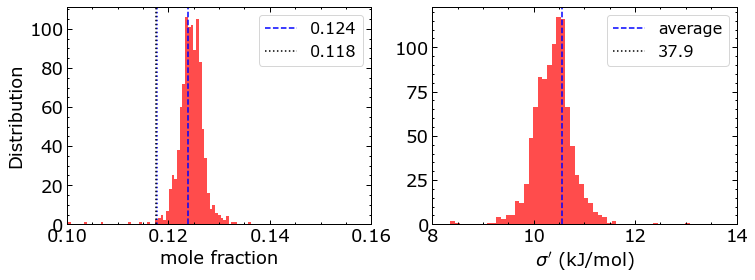

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(xstar1, bins = 'auto',alpha=0.7,color='red',density=False)
ax[0].set_xlabel('mole fraction')
ax[0].set_ylabel('Distribution')

xstar_estimate1=np.mean(xstar1) #np.mean(xstar1)/(2-np.mean(xstar1))
xstar_err1=np.std(xstar1) #np.std(xstar1)/(2-np.std(xstar1))

ax[0].axvline(x=xstar_estimate1, color='b', linestyle='--',label='%.3f' % xstar_estimate1)
ax[0].axvline(x=xstar_estimate1-xstar_err1, color='b', linestyle=':')

ax[0].axvline(x=2*0.0625/(1+0.0625), color='black', linestyle=':',label='%.3f' % (2*0.0625/(1+0.0625)))

ax[0].legend(loc="upper right",frameon=True, fontsize=16)

ax[1].hist(sigma1, bins = 'auto',alpha=0.7,color='red',density=False)
ax[1].set_xlabel('$\\sigma^{\prime}$ (kJ/mol)') #('$\\sigma$ (kT/nm$^2$)')

a,b=np.histogram(sigma1, bins = 'auto')
sigma_estimate1=np.mean(sigma1)
sigma_err1=np.std(sigma1) #standard deviation 

ax[1].axvline(x=sigma_estimate1, color='b', linestyle='--',label='average')
#ax[1].axvline(x=37.9, color='black', linestyle=':',label='37.9')

ax[1].legend(loc="upper right",frameon=True,fontsize=16)

ax[0].set_xlim(0.10,0.16)
ax[1].set_xlim(8,14)


print('\nThe estimated solubility of is:',xstar_estimate1,'+/-',xstar_err1,'[-] (molar fraction of ions)')
print('The estimated surface energy is:',sigma_estimate1,'+/-',sigma_err1,'kJ/mol') #it was kT/nm2 in the origina script

#fig.savefig('1.png', dpi=100, bbox_inches='tight')

0 Sss = 1.89 with x*=0.1239
1 Sss = 1.77 with x*=0.1239
2 Sss = 1.56 with x*=0.1239
3 Sss = 1.59 with x*=0.1239
4 Sss = 1.57 with x*=0.1239
5 Sss = 1.51 with x*=0.1239
6 Sss = 1.54 with x*=0.1239
7 Sss = 1.42 with x*=0.1239


(-100.0, 50.0)

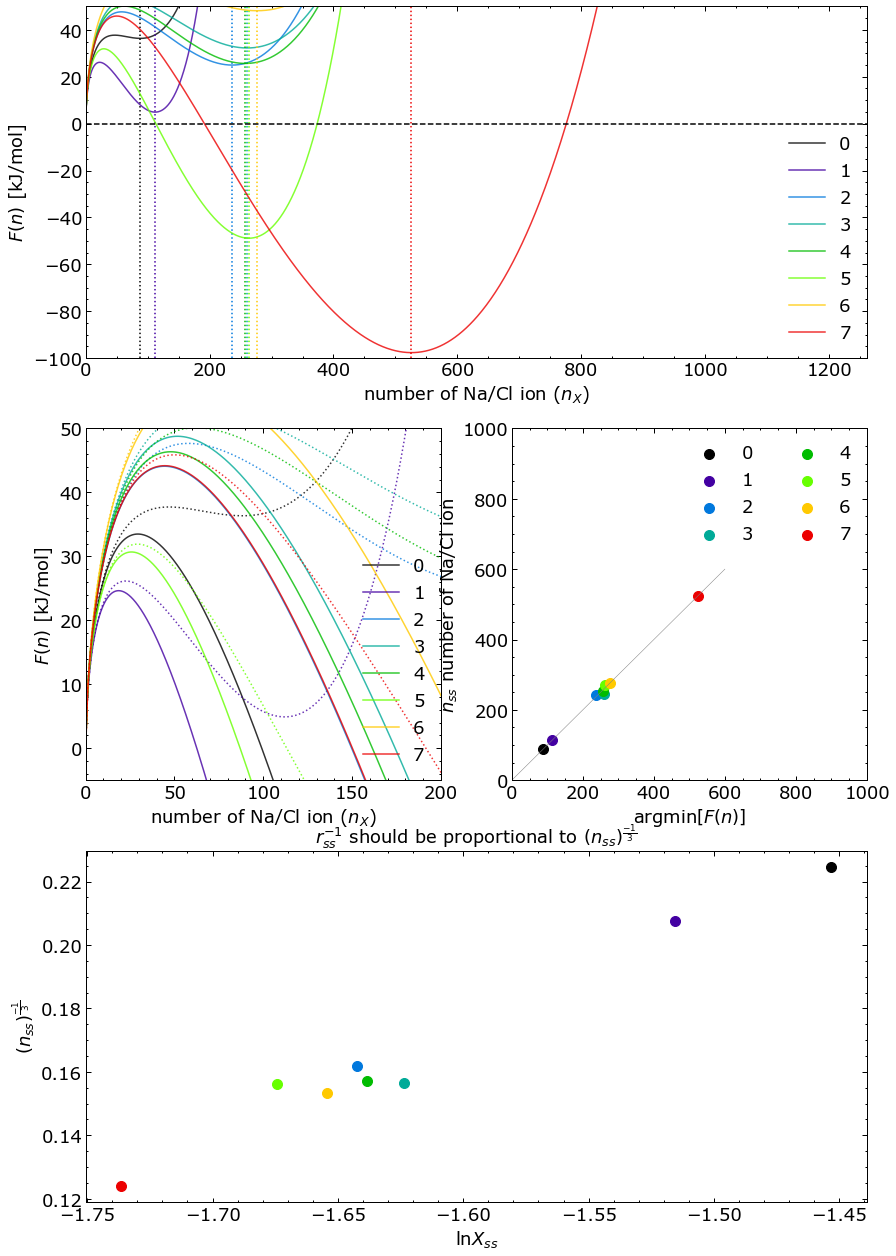

In [17]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "verdana"})
    #"font.verdana": ["computer modern roman"],
    #"font.size": 18})
    
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


#sigma_estimate1_used= #mole fraction 
#xstar_estimate1_used= #kT/nm2

## Plot sub-figures setup
fig = plt.figure(figsize=(14, 22))
sub1 = fig.add_subplot(3,2,(1,2))
sub2 = fig.add_subplot(3,2,3)
sub3 = fig.add_subplot(3,2,4)
sub4 = fig.add_subplot(3,2,(5,6))

## labels
sub1.set_xlabel('number of Na/Cl ion ($n_X$)')
sub1.set_ylabel('$F(n)$ [kJ/mol]')
sub2.set_xlabel('number of Na/Cl ion ($n_X$)')
sub2.set_ylabel('$F(n)$ [kJ/mol]')
sub3.set_xlabel('argmin$[F(n)]$')
sub3.set_ylabel('$n_{ss}$ number of Na/Cl ion')

fes=[]
nn_=[]
argminF=np.zeros(Nsimulations) 
argmaxF=np.zeros(Nsimulations) 
DF=np.zeros(Nsimulations)      
DF_steady=np.zeros(Nsimulations)
xss=np.zeros(Nsimulations)
xss_gamma=np.zeros(Nsimulations)
x_macro=np.zeros(Nsimulations)
rho_macro=np.zeros(Nsimulations)
rho_ss=np.zeros(Nsimulations)
S_ncrit_corr=np.zeros((Nsimulations,2))
S_ncrit_bkcal=np.zeros((Nsimulations,2))

color=iter(cm.nipy_spectral(np.linspace(0,1,Nsimulations+1)))

#compute Free Energies in confined Volume (and plot panel 1)
for SIM in np.arange(0,Nsimulations):
    c=next(color)
    nn=np.linspace(0, (data.Ntot[SIM])-1, num=1000)
    
    X_1=X(data.Nss[SIM],data.Ntot[SIM],data.Nstot[SIM])
    print("%d Sss = %.2lf with x*=%.4lf" % (SIM,X_1/xstar_estimate1,xstar_estimate1))
    if X_1/xstar_estimate1 >= 1.0:
        FES=F(nn,kT, (data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        nn_.append(nn)    
        X_m=X(0,data.Ntot[SIM],data.Nstot[SIM])
        FESm=F_macro(nn,kT,(data.Ntot[SIM]), (data.Nstot[SIM]), xstar_estimate1, sigma_estimate1)
        if SIM>=0:
            argminF[SIM]=nn[FES==np.min(FES[150:])]
            argmaxF[SIM]=nn[FESm==np.max(FESm)]
        else:
            argminF[SIM]=nn[FES==np.min(FES[:])]
            argmaxF[SIM]=nn[FESm==np.max(FESm)]
    
        line,=sub1.plot(nn,FES,color=c,alpha=0.8,label="%d" % SIM)
        sub2.plot(nn,FESm,color=c,alpha=0.8,label="%d" % SIM)
        sub2.plot(nn,FES,color=c,alpha=0.8,ls=":")
        sub1.axvline(x=argminF[SIM],color=c,ls=":")
        sub3.scatter(argminF[SIM],data.Nss[SIM],color=c,s=100,label="%d" % SIM) 
        
        sub4.scatter(np.power(np.log(X_1),1),np.power(argminF[SIM],-1/3),color=c,s=100)
        #sub4.scatter(np.power(X_1,1),np.power(argminF[SIM],-1/3),color=c,s=100)
        
sub4.set_xlabel(r"ln$X_{ss}$")
#sub4.set_xlabel(r"$X_{ss}$")
sub4.set_title(r"$r_{ss}^{-1}$ should be proportional to $(n_{ss})^{\frac{-1}{3}}$")
sub4.set_ylabel(r'$(n_{ss})^{\frac{-1}{3}}$')
sub2.set_ylim([-5,50])
sub2.set_xlim([0,200])        
sub1.legend(frameon=False)
sub2.legend(frameon=False)
sub3.legend(ncol=2,frameon=False)
sub3.plot(np.linspace(0, 600, num=1000),np.linspace(0, 600, num=1000),color='grey',linewidth=0.5) 
sub3.set_xlim(0,1000)
sub3.set_ylim(0,1000)
#sub4.set_xlim(1,2.0)
sub4.legend(ncol=1,loc="upper right",frameon=False)

sub1.axhline(y=0,ls="--",color="black")
sub1.set_xlim(0,)
sub1.set_ylim(-100,50)
#sub1.set_title(r"using $\sigma_1$ and $x^*_1$ from including the extreme point")